In [1]:
import json
import pandas as pd
import os

instance_ids = ['django__django-15781', 'django__django-12125',
       'scikit-learn__scikit-learn-11040', 'sympy__sympy-21614',
       'sphinx-doc__sphinx-8595', 'django__django-12856',
       'django__django-17087', 'matplotlib__matplotlib-26011',
       'django__django-12589', 'pydata__xarray-4094',
       'pylint-dev__pylint-6506', 'scikit-learn__scikit-learn-25747',
       'django__django-14382', 'psf__requests-3362', 'sympy__sympy-23262',
       'sympy__sympy-13895', 'django__django-11049', 'pydata__xarray-4493',
       'matplotlib__matplotlib-23987', 'sympy__sympy-16106',
       'django__django-15498', 'pytest-dev__pytest-5227', 'sympy__sympy-21847',
       'sympy__sympy-13773', 'django__django-14997', 'sympy__sympy-19007',
       'pytest-dev__pytest-5221', 'sphinx-doc__sphinx-8721',
       'sympy__sympy-13031', 'scikit-learn__scikit-learn-13497']


def read_file(path):
    with open(path, 'r') as f:
        return f.read()

def get_run_statistics(run_name):
    df = pd.DataFrame(columns=['repo', 'instance_id', 'has_diff', 'error', 'requeried_len', 'avg_fuzzy_match'])
    run_path = f'../data/results/{run_name}'
    for n ,instance_id in enumerate(instance_ids):
        try:
            diff_path = f'{run_path}/diffs/{instance_id}.diff'
            trajs_path = f'{run_path}/trajs/{instance_id}.json'
            error_path = f'{run_path}/errors/{instance_id}.error'
            patches_path = f'{run_path}/patches/{instance_id}_patches.json'
            has_diff = os.path.exists(diff_path)
            has_trajs = os.path.exists(trajs_path)
            has_patches = os.path.exists(patches_path)
            if not has_trajs:
                print(f'No trajs for {instance_id}')
                continue
            error = None
            requeried_len = 0
            avg_fuzzy_match = 0
            trajs = json.loads(read_file(trajs_path))
            if not has_diff:
                error = read_file(error_path)
            if has_patches:
                patches = json.loads(read_file(patches_path))
                patches = list(patches.values())[0]
                avg_fuzzy_match = sum([p['match_ratio'] for p in patches]) / len(patches)
            # query = trajs[0]
            # evals = trajs[1]
            if len(trajs) > 2:
                # has been requeried
                requeries = trajs[2:]
                requeried_len = len(requeries)
            df.loc[n] = [instance_id.rsplit('-', 1)[0].replace('__', '/'), instance_id, has_diff, error, requeried_len, avg_fuzzy_match]
        except Exception as e:
            print(f'Error processing {instance_id}: {e}')
            continue 
    return df

In [2]:
#RUN_NAME = 'CodeGPT_MultiAgent_Opus4'
RUN_NAME = 'CodeGPT_MultiAgent_Llama4_Maverick'
    
df = get_run_statistics(RUN_NAME)
df

,repo,instance_id,has_diff,error,requeried_len,avg_fuzzy_match
0,django/django,django__django-15781,True,None,3,1.000000
1,django/django,django__django-12125,True,None,0,1.000000
2,scikit-learn/scikit-learn,scikit-learn__scikit-learn-11040,False,Failed to build diff file: No patch match found,3,0.816068
3,sympy/sympy,sympy__sympy-21614,True,None,3,0.621951
4,sphinx-doc/sphinx,sphinx-doc__sphinx-8595,True,None,1,1.000000
5,django/django,django__django-12856,False,Failed to build diff file: No patch match found,3,0.918142
6,django/django,django__django-17087,True,None,1,1.000000
7,matplotlib/matplotlib,matplotlib__matplotlib-26011,True,None,0,1.000000
8,django/django,django__django-12589,False,Failed to build diff file: No patch match found,3,0.785714
9,pydata/xarray,pydata__xarray-4094,False,"LLM query failed: {""code"": 400, ""message"": ""Er...",0,0.000000


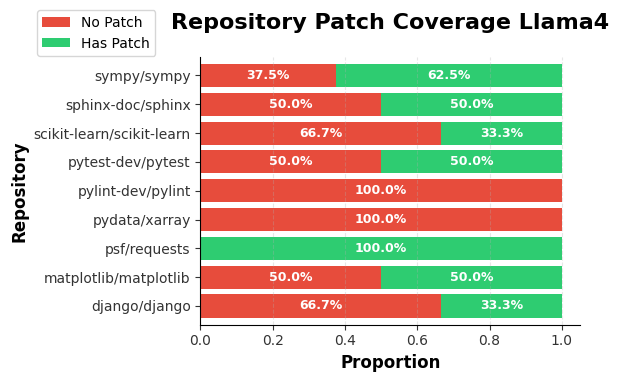

In [3]:
import matplotlib.pyplot as plt

# Create a crosstab with normalized values
crosstab = pd.crosstab(df['repo'], df['has_diff'], normalize='index')

# Reorder columns to show True first, then False
# Create the horizontal stacked bar plot with custom colors
fig, ax = plt.subplots(figsize=(6, 4))
crosstab.plot(kind='barh', stacked=True, ax=ax, color=['#e74c3c', '#2ecc71'], width=0.8)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize the plot
ax.set_title('Repository Patch Coverage Llama4', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Proportion', fontsize=12, fontweight='bold')
ax.set_ylabel('Repository', fontsize=12, fontweight='bold')

# Customize legend - position it next to the title
ax.legend(title_fontsize=12, fontsize=10, 
          labels=['No Patch', 'Has Patch'], loc='upper right', bbox_to_anchor=(-0.1, 1.2))

# Add grid for better readability
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='x', colors='#333333')
ax.tick_params(axis='y', colors='#333333')

# Add percentage labels on bars
for i, (repo, row) in enumerate(crosstab.iterrows()):
    cumulative = 0
    for j, (col, value) in enumerate(row.items()):
        if value > 0.05:  # Only show label if segment is large enough
            ax.text(cumulative + value/2, i, f'{value:.1%}', 
                   ha='center', va='center', fontweight='bold', 
                   color='white', fontsize=9)
        cumulative += value

plt.tight_layout()
plt.show()


In [4]:
RUN_NAME = 'CodeGPT_MultiAgent_Opus4'
opus_df = get_run_statistics(RUN_NAME)
RUN_NAME = 'CodeGPT_MultiAgent_Llama4_Maverick'
llama_df = get_run_statistics(RUN_NAME)

In [13]:
has_diff_llama = llama_df.query('has_diff == True')['instance_id'].to_list()

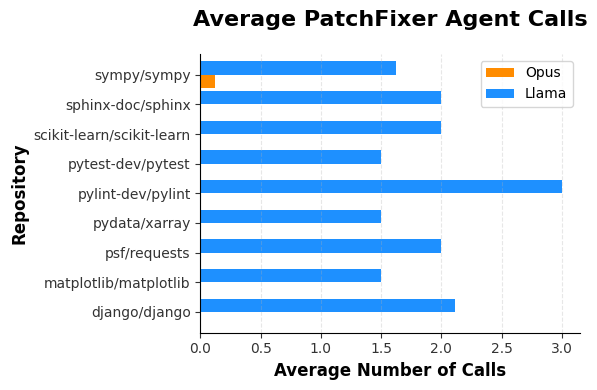

In [5]:
concat_df = opus_df.groupby('repo')['requeried_len'].mean().to_frame('opus').join(
    llama_df.groupby('repo')['requeried_len'].mean().to_frame('llama')
)
fig, ax = plt.subplots(figsize=(6, 4))

concat_df.plot(kind='barh', stacked=False, ax=ax, color=['#ff8c00', '#1e90ff'], width=0.9)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize the plot
ax.set_title('Average PatchFixer Agent Calls', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Average Number of Calls', fontsize=12, fontweight='bold')
ax.set_ylabel('Repository', fontsize=12, fontweight='bold')

# Position legend next to the title
ax.legend(title_fontsize=12, fontsize=10, 
          labels=['Opus', 'Llama'], loc='upper right', bbox_to_anchor=(1, 1))

# Add grid for better readability
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='x', colors='#333333')
ax.tick_params(axis='y', colors='#333333')

plt.tight_layout()
plt.show()


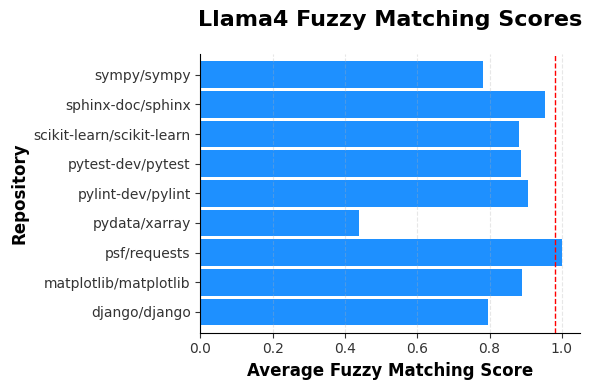

In [6]:
data = llama_df.groupby('repo')['avg_fuzzy_match'].mean().to_frame('llama')
fig, ax = plt.subplots(figsize=(6, 4))

data.plot(kind='barh', stacked=False, ax=ax, color=['#1e90ff'], width=0.9)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize the plot
ax.set_title('Llama4 Fuzzy Matching Scores', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Average Fuzzy Matching Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Repository', fontsize=12, fontweight='bold')

# Add grid for better readability
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Remove legend
ax.legend().set_visible(False)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='x', colors='#333333')
ax.tick_params(axis='y', colors='#333333')


plt.axvline(0.98, ls='--', color='red', label='Threshold', lw=1)
plt.tight_layout()
plt.show()


In [3]:
import json
swe_bench_path = "../data/results/swe-bench"
OPUS = 'CodeGPT_MultiAgent_Opus4'
LLAMA = 'CodeGPT_MultiAgent_Llama4_Maverick'
opus_json_path = f"{swe_bench_path}/{OPUS}.0.json"
llama_json_path = f"{swe_bench_path}/{LLAMA}.0.json"

with open(opus_json_path, 'r') as f:
    opus_json = json.load(f)

with open(llama_json_path, 'r') as f:
    llama_json = json.load(f)

In [8]:
all_ids = opus_json['completed_ids']
res = {
    'opus' : opus_json,
    'llama': llama_json
}
swe_df = pd.DataFrame(all_ids, columns=['id']).set_index('id')
for model, json_data in res.items():
    swe_df[model] = False
    for i in json_data['resolved_ids']:
        swe_df.loc[i, model] = True
swe_df = swe_df.reset_index()
# swe_df['opus'].value_counts(), swe_df['llama'].value_counts()
swe_df['repo'] = swe_df['id'].apply(lambda x: x.rsplit('-')[0].replace('__', '/'))


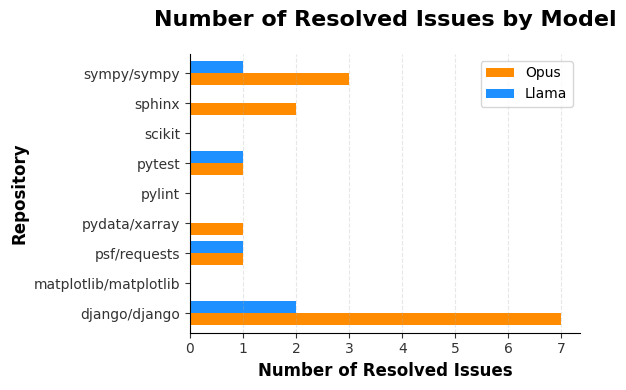

In [9]:
repo_counts = swe_df.groupby('repo')[['opus', 'llama']].sum()

fig, ax = plt.subplots(figsize=(6, 4))

repo_counts.plot(kind='barh', stacked=False, ax=ax, color=['#ff8c00', '#1e90ff'], width=0.8)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize the plot
ax.set_title('Number of Resolved Issues by Model', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Number of Resolved Issues', fontsize=12, fontweight='bold')
ax.set_ylabel('Repository', fontsize=12, fontweight='bold')

# Position legend next to the title
ax.legend(title_fontsize=12, fontsize=10, 
          labels=['Opus', 'Llama'], loc='upper right', bbox_to_anchor=(1, 1))

# Add grid for better readability
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='x', colors='#333333')
ax.tick_params(axis='y', colors='#333333')

plt.tight_layout()
plt.show()


In [10]:
# resolved by opus and llama
swe_df[(swe_df['opus'] == True) & (swe_df['llama'] == True)]

,id,opus,llama,repo
1,django__django-12125,True,True,django/django
8,django__django-17087,True,True,django/django
11,psf__requests-3362,True,True,psf/requests
16,pytest-dev__pytest-5227,True,True,pytest
27,sympy__sympy-21614,True,True,sympy/sympy


In [11]:
# resolved by opus but no llama
swe_df[(swe_df['opus'] == True) & (swe_df['llama'] == False)]

,id,opus,llama,repo
0,django__django-11049,True,False,django/django
2,django__django-12589,True,False,django/django
3,django__django-12856,True,False,django/django
4,django__django-14382,True,False,django/django
7,django__django-15781,True,False,django/django
12,pydata__xarray-4094,True,False,pydata/xarray
20,sphinx-doc__sphinx-8595,True,False,sphinx
21,sphinx-doc__sphinx-8721,True,False,sphinx
28,sympy__sympy-21847,True,False,sympy/sympy
29,sympy__sympy-23262,True,False,sympy/sympy


In [14]:
swe_df[(swe_df['opus'] == False) & (swe_df['llama'] == False)].pipe(lambda x : x[x['id'].isin(has_diff_llama)]).id.to_list()

['matplotlib__matplotlib-26011',
 'scikit-learn__scikit-learn-13497',
 'sympy__sympy-13031',
 'sympy__sympy-13773',
 'sympy__sympy-16106']

In [15]:
# resolved by llama but no opus
swe_df[(swe_df['opus'] == False) & (swe_df['llama'] == True)]

,id,opus,llama,repo


In [16]:
# unresolved by llama and opus
swe_df[(swe_df['opus'] == False) & (swe_df['llama'] == False)]

,id,opus,llama,repo
5,django__django-14997,False,False,django/django
6,django__django-15498,False,False,django/django
9,matplotlib__matplotlib-23987,False,False,matplotlib/matplotlib
10,matplotlib__matplotlib-26011,False,False,matplotlib/matplotlib
13,pydata__xarray-4493,False,False,pydata/xarray
14,pylint-dev__pylint-6506,False,False,pylint
15,pytest-dev__pytest-5221,False,False,pytest
17,scikit-learn__scikit-learn-11040,False,False,scikit
18,scikit-learn__scikit-learn-13497,False,False,scikit
19,scikit-learn__scikit-learn-25747,False,False,scikit


In [20]:
run_name = RUN_NAME
df = pd.DataFrame(columns=['repo', 'instance_id', 'has_diff', 'error', 'requeried_len', 'avg_fuzzy_match'])
patches_dict = {}

run_path = f'../data/results/{run_name}'

for n ,instance_id in enumerate(instance_ids):
    try:
        diff_path = f'{run_path}/diffs/{instance_id}.diff'
        trajs_path = f'{run_path}/trajs/{instance_id}.json'
        error_path = f'{run_path}/errors/{instance_id}.error'
        patches_path = f'{run_path}/patches/{instance_id}_patches.json'
        has_diff = os.path.exists(diff_path)
        has_trajs = os.path.exists(trajs_path)
        has_patches = os.path.exists(patches_path)
        if not has_trajs:
            print(f'No trajs for {instance_id}')
            continue
        error = None
        requeried_len = 0
        avg_fuzzy_match = 0
        trajs = json.loads(read_file(trajs_path))
        if not has_diff:
            error = read_file(error_path)
        if has_patches:
            patches = json.loads(read_file(patches_path))
            patches = list(patches.values())[0]
            patches_dict[instance_id] = patches
            avg_fuzzy_match = sum([p['match_ratio'] for p in patches]) / len(patches)
        # query = trajs[0]
        # evals = trajs[1]
        if len(trajs) > 2:
            # has been requeried
            requeries = trajs[2:]
            requeried_len = len(requeries)
        df.loc[n] = [instance_id.rsplit('-', 1)[0].replace('__', '/'), instance_id, has_diff, error, requeried_len, avg_fuzzy_match]
    except Exception as e:
        print(f'Error processing {instance_id}: {e}')
        continue 
df

,repo,instance_id,has_diff,error,requeried_len,avg_fuzzy_match
0,django/django,django__django-15781,True,None,3,1.000000
1,django/django,django__django-12125,True,None,0,1.000000
2,scikit-learn/scikit-learn,scikit-learn__scikit-learn-11040,False,Failed to build diff file: No patch match found,3,0.816068
3,sympy/sympy,sympy__sympy-21614,True,None,3,0.621951
4,sphinx-doc/sphinx,sphinx-doc__sphinx-8595,True,None,1,1.000000
5,django/django,django__django-12856,False,Failed to build diff file: No patch match found,3,0.918142
6,django/django,django__django-17087,True,None,1,1.000000
7,matplotlib/matplotlib,matplotlib__matplotlib-26011,True,None,0,1.000000
8,django/django,django__django-12589,False,Failed to build diff file: No patch match found,3,0.785714
9,pydata/xarray,pydata__xarray-4094,False,"LLM query failed: {""code"": 400, ""message"": ""Er...",0,0.000000


In [21]:
for id in df.query('has_diff == False')['instance_id']:
    try:
        match = patches_dict[id][-1]['match_ratio']
    except:
        continue
    print(f'instance_id: {id}')
    print(f'Score: {match:.2f}')
    print('--- @@REPLACE@@ ---')
    print(patches_dict[id][-1]['orig_text'])
    print('--- BEST MATCH ---')
    print(patches_dict[id][-1]['match_segment'])
    print('\n')

instance_id: scikit-learn__scikit-learn-11040
Score: 0.82
--- @@REPLACE@@ ---
 if n_neighbors is None:
 n_neighbors = self.n_neighbors

 if X is not None:

--- BEST MATCH ---
    if n_neighbors is None:
            n_neighbors = self.n_neighbors

     


instance_id: django__django-12856
Score: 0.92
--- @@REPLACE@@ ---
def _check_constraints(cls, databases):
    errors = []
    for db in databases:
        if not router.allow_migrate_model(db, cls):
            continue
        connection = connections[db]
        if not (
            connection.features.supports_table_check_constraints or
            'supports_table_check_constraints' in cls._meta.required_db_features
        ) and any(
            isinstance(constraint, CheckConstraint)
            for constraint in cls._meta.constraints
        ):
            errors.append(
                checks.Warning(
                    '%s does not support check constraints.' % connection.display_name,
                    hint=(
              